# Домашнее задание 1-3 (продолжение)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача

__1.__ Скачайте с помощью кода, приведённого ниже, набор фотографий и нарисуйте какую-нибудь из них.

In [2]:
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np

Shape of data = (400, 64, 64)


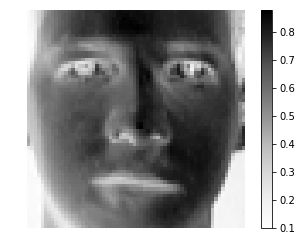

In [3]:
print("Shape of data = {}".format(data["images"].shape))
index = 7
plt.imshow(data["images"][index], cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

__2.__ Одним из способов обработки изображений, например для выделения наиболее важных сегментов используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Вопросы**

1) является ли эта задача выпуклой и почему?

2) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

1)Пусть, например, $m=k=n=1$

Тогда $f(w,h) = \frac 12 \Vert x-wh \Vert^2_F = \frac 12 (x^2 - 2xwh + w^2 h^2)$

$\textbf{s.t.} g_1(w) = w \geqslant 0$

$g_2(h) = h \geqslant 0$

$\nabla f(w,h)=\begin{bmatrix} 2wh^2 - 2xh \\ 2w^2h - 2xw \end{bmatrix}$

$\nabla^2 f(w,h)=\begin{bmatrix} 2h^2 & 4wh - 2x \\ 4wh - 2x & 2w^2 \end{bmatrix}$

Такой гессиан не всегда будет положительно полуопределенным. Например, при $w=x=1$, $h=2$

$\text{det}(\nabla^2 f(1,2))|_{x=1}= \text{det}\begin{bmatrix} 8 & 6 \\ 6 & 2 \end{bmatrix} = -20 < 0$

Значит, функция невыпуклая, и, соответственно, невыпуклой будет и задача.

2) $\mathbf{W}$ как набор из $k$ базисных элементов, по которым раскладываются изображения, $\mathbf{H}$ как $m$ наборов весов(или коэффициентов), соответствующих базисным элементам. Покомпонентная неотрицательность важна, поскольку базисные элементы - картинки, а как построить картинку по отрицательным значениям пикселей - непонятно. Неясно также, что мог бы значить, например, отрицательный вклад какого-либо базисного элемента. 

В данном алгоритме на каждой итерации задача решается относительно какого-то одного параметра при фиксированном другом параметре. Возможно, при покомпонентной неотрицательности матрицы задача становится выпуклой, но это не точно.

__3.__ Такую задачу можно решать с помощью CVXPy, если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях решить точно задачу относительно параметра $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и найти решение задачи относительной $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами. От инициализации будет сильно зависеть качество решения и скорость работы методов.

**Задачи**

1) реализуйте с помощью CVXPy идею попеременной оптимизации для этой задачи и решите её

2) нарисуйте график сходимости по функции и убедитесь, что метод сошёлся или же изменение целевой функции пренебрежимо мало

3) поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10-50 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос 2) предыдущего пункта? Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

4) Нарисуйте матрицу $W$ с помощью функции ```plt.imshow``` или ```plt.spy```. Насколько сильно она заполнена и почему?

In [4]:
# !!!
# осторожно, код ниже съедает до 5000 мб оперативной памяти и может повесить систему
# для снижения объема потребляемой памяти уменьшить k или решать задачу при меньшем числе картинок

# используемая версия CVXPY - 0.4.10

import cvxpy as cp
import numpy as np


#===============
A=data["images"].reshape(400,4096)

#A = np.delete(A, np.s_[99:399], axis=0)


m = A.shape[0]
n = A.shape[1]
k = 17
#===============

# Initialize Y randomly.
Y_init = np.random.rand(m, k)

In [5]:
# Ensure same initial random Y, rather than generate new one
# when executing this cell.
Y = Y_init

# Perform alternating minimization.
MAX_ITERS = 15
residual = np.zeros(MAX_ITERS)
for iter_num in range(1, 1+MAX_ITERS):
    # At the beginning of an iteration, X and Y are NumPy
    # array types, NOT CVXPY variables.

    # For odd iterations, treat Y constant, optimize over X.
    if iter_num % 2 == 1:
        X = cp.Variable(k, n)
        constraint = [X >= 0]
    # For even iterations, treat X constant, optimize over Y.
    else:
        Y = cp.Variable(m, k)
        constraint = [Y >= 0]

    # Solve the problem.
    # increase max iters otherwise, a few iterations are "OPTIMAL_INACCURATE"
    # (eg a few of the entries in X or Y are negative beyond standard tolerances)
    obj = cp.Minimize(cp.norm(A - Y*X, 'fro'))
    prob = cp.Problem(obj, constraint)
    prob.solve(solver=cp.SCS, max_iters=30)

    #if prob.status != cp.OPTIMAL:
     #   raise Exception("Solver did not converge!")

    print('Iteration {}, residual norm {}'.format(iter_num, prob.value))
    residual[iter_num-1] = prob.value

    # Convert variable to NumPy array constant for next iteration.
    if iter_num % 2 == 1:
        X = X.value
    else:
        Y = Y.value

Iteration 1, residual norm 204.05114294806503
Iteration 2, residual norm 123.56521296858695
Iteration 3, residual norm 105.4286823404404
Iteration 4, residual norm 99.77522242485033
Iteration 5, residual norm 97.92019252283241
Iteration 6, residual norm 96.48999497970713
Iteration 7, residual norm 95.93648233368012
Iteration 8, residual norm 95.09451524061151
Iteration 9, residual norm 94.9789683351292
Iteration 10, residual norm 94.33676405019601
Iteration 11, residual norm 94.44091781971457
Iteration 12, residual norm 93.88099018139161
Iteration 13, residual norm 94.10555983928423
Iteration 14, residual norm 93.58086755995963
Iteration 15, residual norm 93.8746947370921


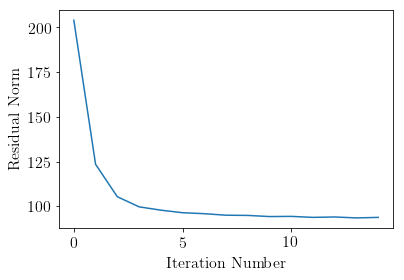

Original matrix:
[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]
Left factor Y:
[[ 0.78738846  0.226502    0.21563906 ... -0.05388835  0.04485722
   0.73633761]
 [ 1.003344    1.81914838 -0.03965475 ... -0.12062098  0.24393842
  -0.07526279]
 [ 0.83751258  0.4975702   0.6885278  ... -0.04790846 -0.08344996
   0.21847451]
 ...
 [ 0.49805798  1.02775939  1.04354697 ...  0.32041283 -0.01654856
  -0.03283571]
 [-0.08952564 -0.06048426 -0.03834375 ...  2.07288233 -0.056713
   1.22988184]
 [ 0.47199645  0.01057351  0.90346343 ...  2.3540906   0.9932017
   0.14822486]]
Right factor X:
[[ 0.02097725  0.00

In [6]:
import matplotlib.pyplot as plt

# Show plot inline in ipython.
%matplotlib inline

# Set plot properties.
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Create the plot.
plt.plot(residual)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()

#
# Print results.
#
print('Original matrix:')
print(A)
print('Left factor Y:')
print(Y)
print('Right factor X:')
print(X)
print('Residual A - Y * X:')
print(A - Y.dot(X))
print('Residual after {} iterations: {}'.format(iter_num, prob.value))

Shape of data = (17, 4096)


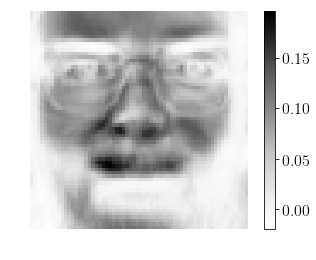

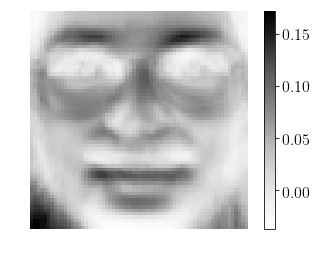

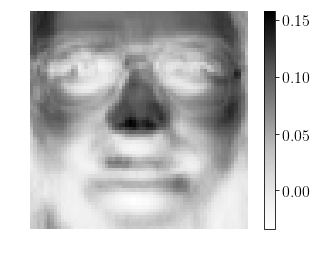

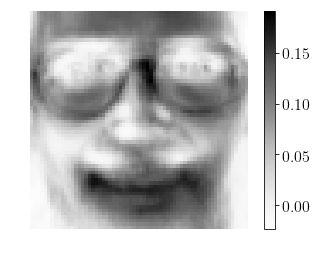

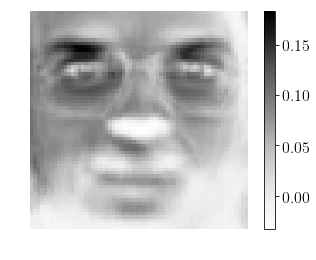

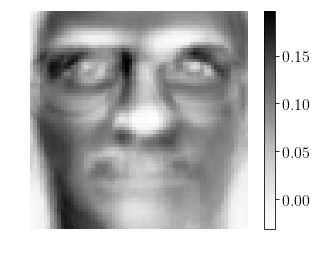

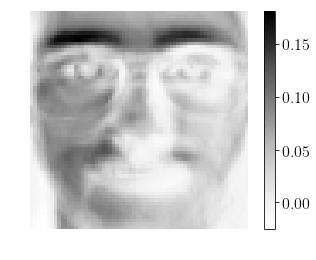

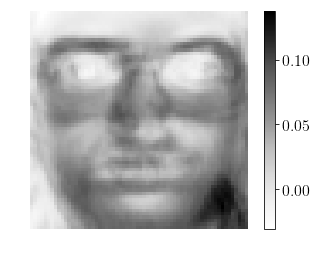

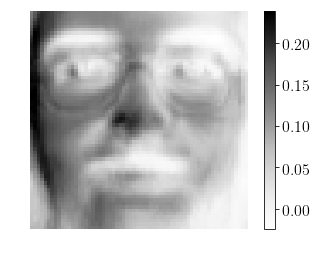

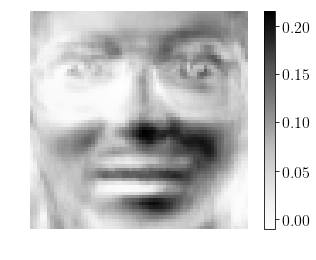

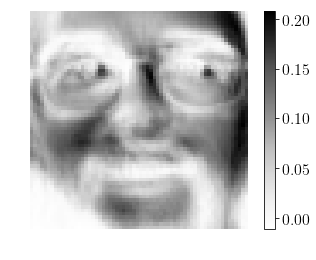

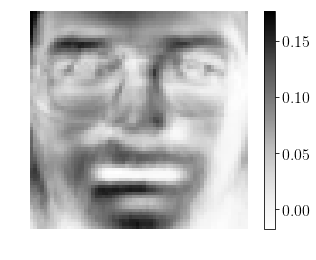

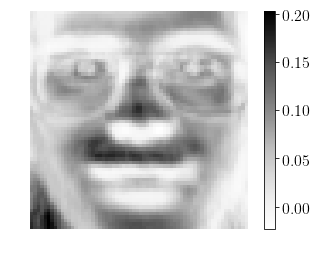

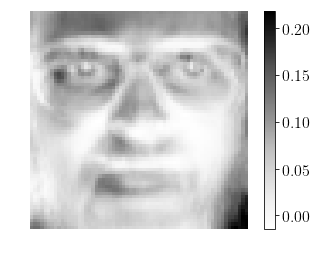

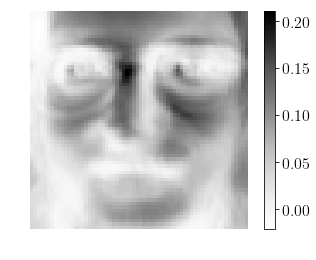

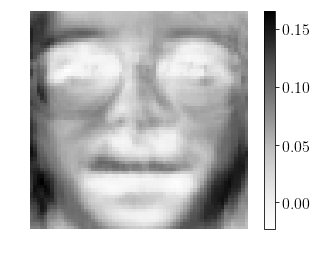

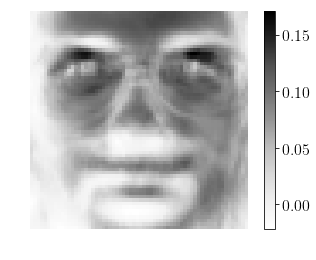

In [7]:
print("Shape of data = {}".format(X.shape))
for i in range (X.shape[0]):
    plt.imshow(X[i].reshape(64,64), cmap=plt.cm.Greys)
    plt.colorbar()
    _ = plt.axis("off")
    plt.show()

Shape of data = (400, 17)


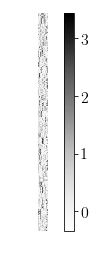

In [8]:
print("Shape of data = {}".format(Y.shape))
plt.imshow(Y, cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

Shape of data = (400, 17)
Shape of data = (40, 17)


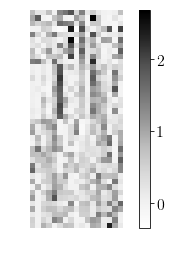

In [9]:
print("Shape of data = {}".format(Y.shape))
Yedit = np.delete(Y,np.s_[39:399], axis=0)
print("Shape of data = {}".format(Yedit.shape))
plt.imshow(Yedit, cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")